In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skm
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

y = df.quality
y -= 3
X = df.drop(['fixed acidity', 'quality'],axis=1)

X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = skm.train_test_split(X_train,y_train,test_size = 0.2, stratify=y_train, random_state=42)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [2]:
knn = KNeighborsRegressor(n_neighbors=16, metric='cosine', weights='distance', algorithm='brute')
knn.fit(X_train, y_train)
y_pred_val_raw1 = knn.predict(X_val)
y_pred_val = np.around(y_pred_val_raw1)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.68359375


In [3]:
mlp = MLPRegressor(hidden_layer_sizes=((160,)*4)\
                            ,max_iter=10000,\
                            random_state=30, activation='relu',alpha=1)
mlp.fit(X_train, y_train)
y_pred_val_raw2 = mlp.predict(X_val)
y_pred_val = np.around(y_pred_val_raw2)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.5546875


In [4]:
rfr = RandomForestRegressor(random_state=30)
rfr.fit(X_train, y_train)
y_pred_val_raw3 = rfr.predict(X_val)
y_pred_val = np.around(y_pred_val_raw3)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(accuracy_val)

0.66796875


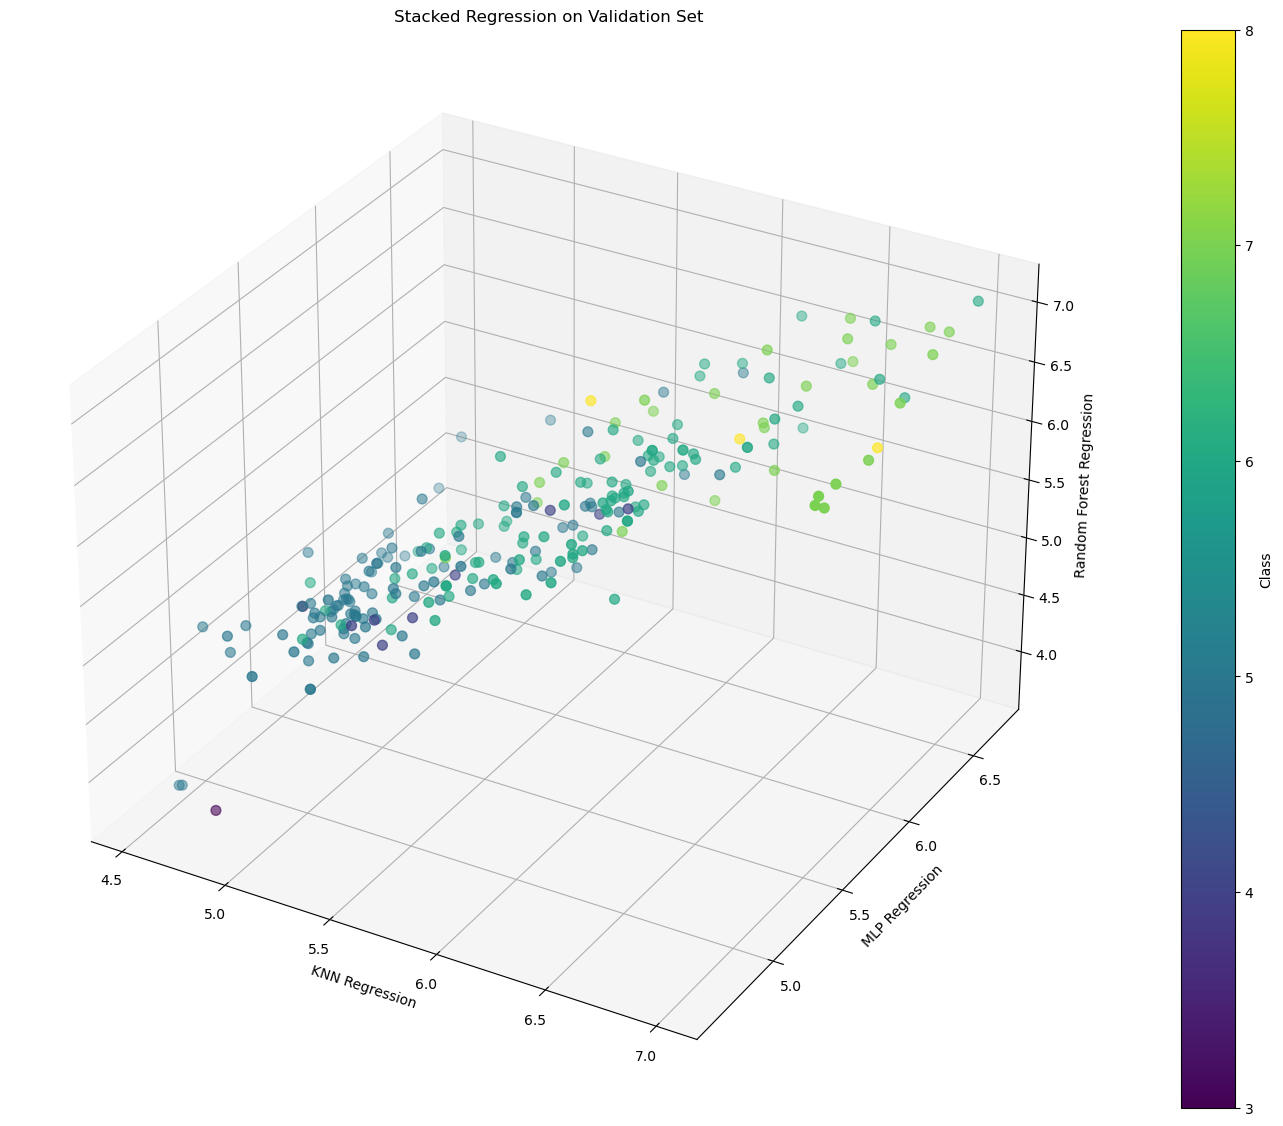

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(y_pred_val_raw1+3, y_pred_val_raw2+3, y_pred_val_raw3+3, c=y_val+3, s=50, cmap='viridis')
fig.colorbar(p, label='Class')
ax.set_xlabel('KNN Regression')
ax.set_ylabel('MLP Regression')
ax.set_zlabel('Random Forest Regression')
plt.title('Stacked Regression on Validation Set')
plt.rcParams["figure.figsize"] = (24,14)
plt.show()

In [6]:
new = np.stack((y_pred_val_raw1, y_pred_val_raw2, y_pred_val_raw3), axis=1)
meta_knn = KNeighborsRegressor(n_neighbors=24, metric='cityblock', weights='distance', algorithm='brute')
meta_knn.fit(new, y_val)
test_raw1 = knn.predict(X_test)
test_raw2 = mlp.predict(X_test)
test_raw3 = rfr.predict(X_test)
test = np.stack((test_raw1, test_raw2, test_raw3), axis=1)
y_pred = meta_knn.predict(test)
y_pred = np.around(y_pred)
accuracy_report = classification_report(y_test+3, y_pred+3)
print(accuracy_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.80      0.78       136
           6       0.67      0.77      0.72       128
           7       0.72      0.53      0.61        40
           8       1.00      0.33      0.50         3

    accuracy                           0.72       320
   macro avg       0.53      0.41      0.44       320
weighted avg       0.69      0.72      0.70       320



/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
